In [1]:
%matplotlib inline


Using simple NumPy operations for manipulating images
=====================================================

This script illustrates how to use basic NumPy operations, such as slicing,
masking and fancy indexing, in order to modify the pixel values of an image.



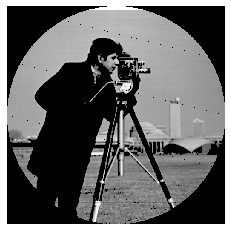

In [2]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()

#在此处修改camera图像的部分像素值

camera[ :10]=255                                                     # 将图像前面10行的值赋为0(切片)
#掩蔽（用布尔值掩码索引）：
mask = camera < 87                                                   # 寻找图像中像素值小于87的像素点 
camera[mask] = 0                                                     # 将找到的点赋值为255
# 建立索引  (花式索引)
inds_x = np.arange(len(camera))
inds_y = (4 * inds_x) % len(camera)
camera[inds_x,inds_y] = 0                                            # 对应索引的像素赋值为0


#此处设置阈值生成掩膜

l_x,l_y = camera.shape[0],camera.shape[1]                            # 获取图像的行数（高），列数（宽）
X,Y = np.ogrid[ :l_x, :l_y]                                          # 建立网格坐标索引
outer_disk_mask = (X - l_x /2)**2 +(Y - l_y / 2)**2 > (l_x /2)**2    # 生成圆形的网格坐标
camera[outer_disk_mask] = 0                                          # 对网格坐标赋0


#此处生成黑色圆圈掩膜，并设置掩膜像素值, 然后将其作用到camera图像上

plt.figure(figsize=(4, 4))                                           # 建立figure的尺寸比例
plt.imshow(camera, cmap='gray')                                      # 显示图像
plt.axis('off')                                                      # 关掉图像的坐标
plt.show()